In [1]:
 #importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
from qiskit.circuit.library import QFT

import numpy as np


In [2]:
#Defining pi

pi = np.pi

#Defining angle

angle = 2*pi/3

#Defining phase

actual_phase = angle/(2*pi)

In [3]:

#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


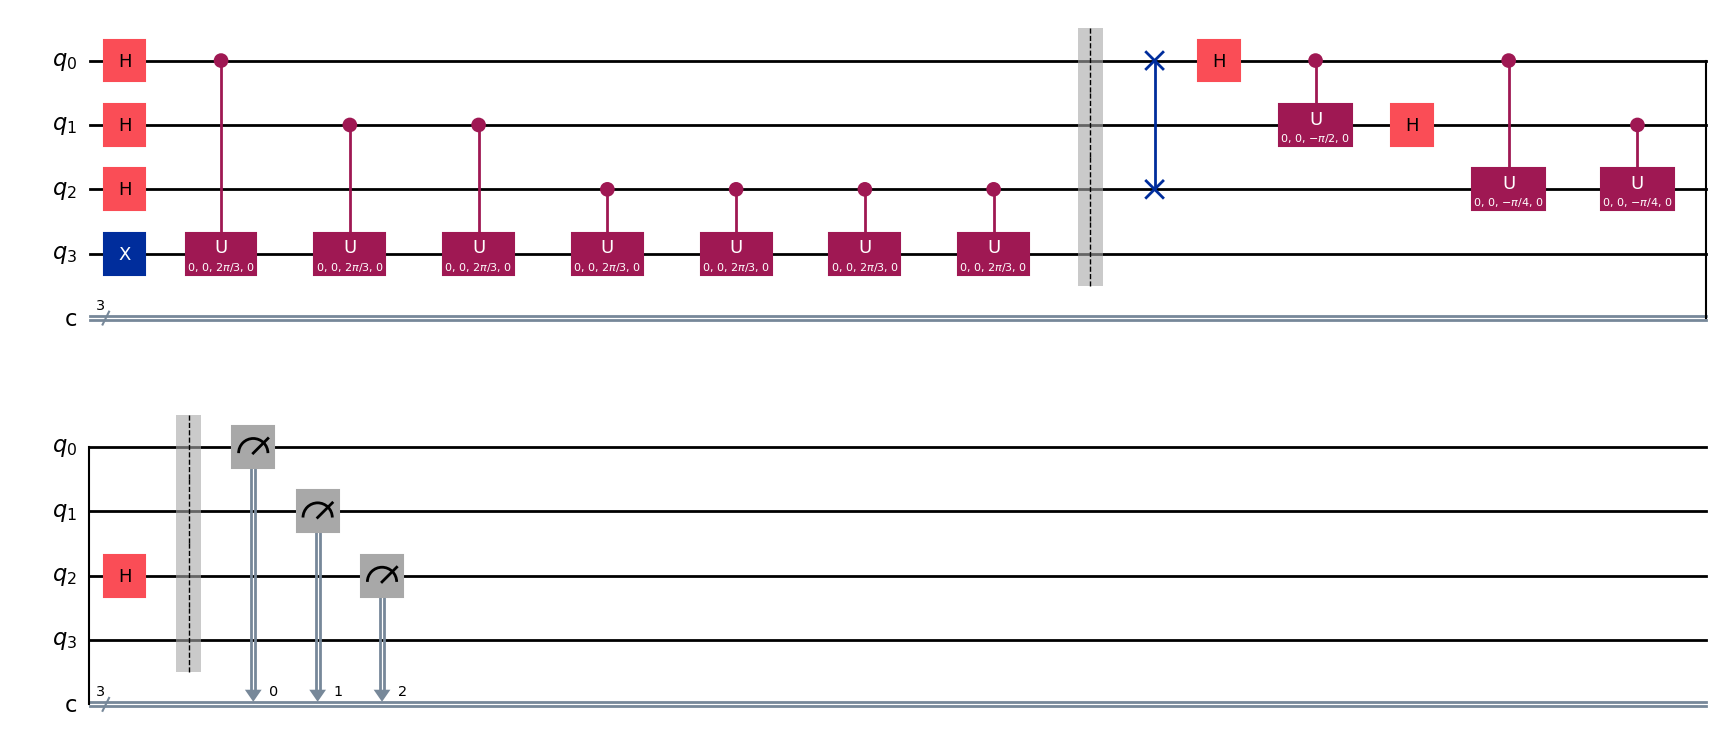

In [4]:
#initializing  quantum circuit
qc = QuantumCircuit(4,3)   #N = 4 qubits. N=3 classical bits


### Controlled unitary operations

#puting q0, q1 e q2 in superposition

qc.h(0)
qc.h(1)
qc.h(2)

#Aply X to q3-----------> i.e., flip q3

qc.x(3)

#Rotation on q0 and q3

qc.cu(0,0,angle,0, 0,3) #Where angle is the rotation amount, q0 is the control and q3 is the target qubit
                        #Originally I have used cu1, however it seems this function does not exist anymore in this version
                        #The expression above for cu(0,0,angle,0,0,3) = cu1(angle,0,3)
                        #cu(0,0,angle,0,0,3) = cu(theta, phi, lambda, gamma, control, target)
                        
#Rotation on q1 and q3

qc.cu( 0,0,angle,0, 1,3)
qc.cu(0,0,angle,0, 1,3)

#Rotation on q2 and q3

qc.cu(0,0,angle,0, 2,3)
qc.cu(0,0,angle,0, 2,3)
qc.cu(0,0,angle,0, 2,3)
qc.cu(0,0,angle,0, 2,3)

#Aply a barrier

qc.barrier()

#buinding a inverse QFT 
#changing q0 by q2

qc.swap(0,2)

#Put q0 in superposition

qc.h(0)

#rotate q1

qc.cu(0,0,-pi/2,0,0,1)

#Put q1 in superposition

qc.h(1)

#Rotate q2

qc.cu(0,0,-pi/4,0,0,2)
qc.cu(0,0,-pi/4,0, 1,2)

#Put q2 in superposition

qc.h(2)

#Aply a barrier

qc.barrier()

### Measuring couting Qubits

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

#Print the circuit

qc.draw("mpl")

#print(circuit)

#Definindo o numero de qubits e bits

#q = QuantumRegister(4, 'q')

#c = ClassicalRegister(3, 'c')

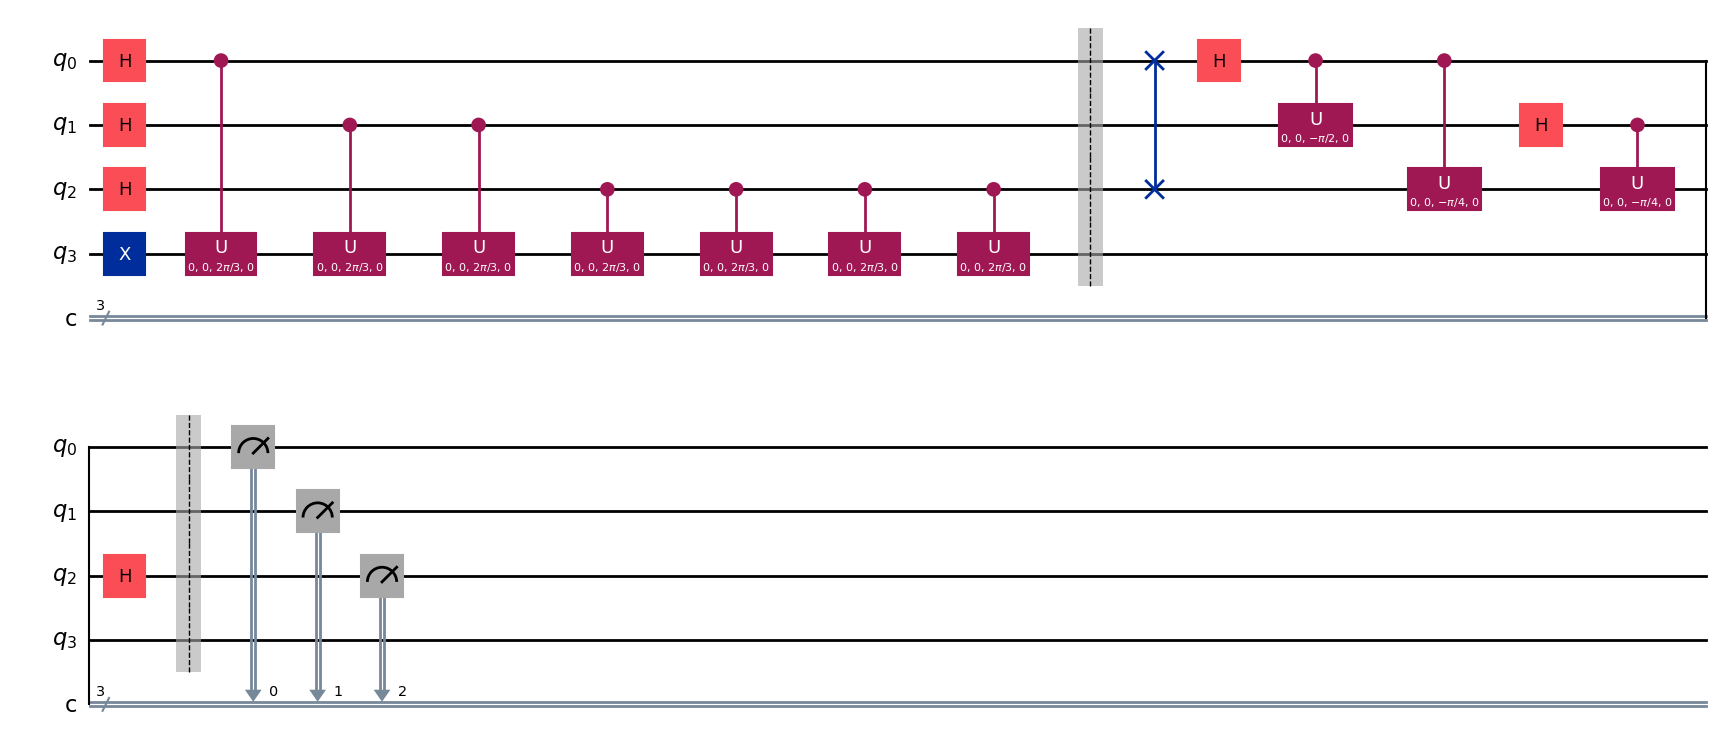

In [5]:

#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

#Definindo circuito

#circuit = QuantumCircuit(q,c)

In [6]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. According to the circuit we measure 'c'
#counts
print('RESULT ', counts)


RESULT  {'011': 638, '110': 73, '100': 59, '010': 111, '001': 38, '111': 38, '000': 22, '101': 21}


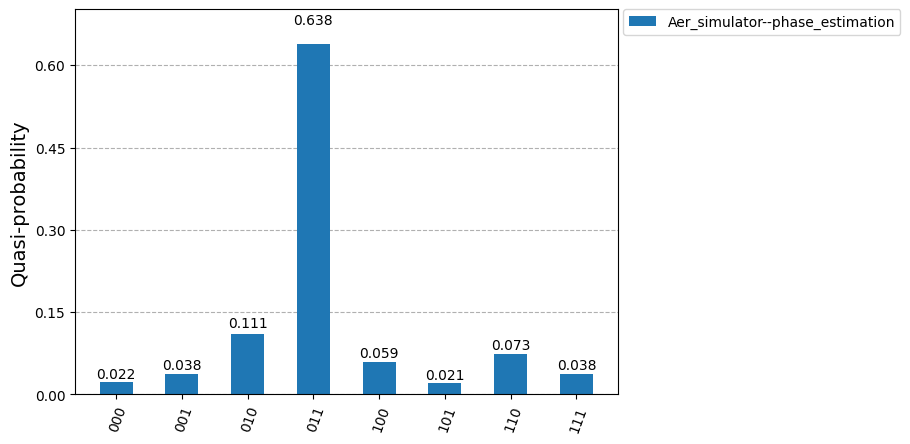

In [7]:

plot_distribution([counts], legend = ['Aer_simulator--phase_estimation'])


### Controlled unitary operations

In [8]:
##Get the most frequent result

#a = counts.most_frequent() --->>> it did not work in this version


#Print ht e most frequent result

print(' Phase estimation output according to the plot above')
print('\n Most frequent measurement: 011 \n') 


 Phase estimation output according to the plot above

 Most frequent measurement: 011 



In [9]:
#Converta para inteiro

bin = int('011', 2)#Convert the binary value to an integer
print(bin)

3


In [10]:
#Calcule a phase

phase = bin/(2**3) # The calculation used to estimate the phase
print(phase)

0.375


In [11]:
#Imprima o resultado final

print(' Actual phase is: ', actual_phase)
print('\n Estimate phase is ', phase)

 Actual phase is:  0.3333333333333333

 Estimate phase is  0.375
